In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
from google.colab import auth
auth.authenticate_user()

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Not connected to a GPU')
else:
  print(gpu_info)

Sun Jan 12 21:32:20 2025       
+---------------------------------------------------------------------------------------+
| NVIDIA-SMI 535.104.05             Driver Version: 535.104.05   CUDA Version: 12.2     |
|-----------------------------------------+----------------------+----------------------+
| GPU  Name                 Persistence-M | Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |         Memory-Usage | GPU-Util  Compute M. |
|                                         |                      |               MIG M. |
|=========================================+======================+======================|
|   0  NVIDIA A100-SXM4-40GB          Off | 00000000:00:04.0 Off |                    0 |
| N/A   29C    P0              44W / 400W |      2MiB / 40960MiB |      0%      Default |
|                                         |                      |             Disabled |
+-----------------------------------------+----------------------+--

In [ ]:
import tensorflow as tf
print("Num GPUs Available: ", len(tf.config.experimental.list_physical_devices('GPU')))


Num GPUs Available:  1


In [ ]:
!pip install tensorflow==2.15.0
!pip install keras==2.13.1
!pip install --upgrade google-cloud-storage
!pip install opencv-python
!pip install tensorflow-addons
!pip install keras-tuner
!pip install seaborn
!pip install scikit-image
!pip install tensorflow timm pydicom
!pip install onnx-tf
!pip install vit-keras
!pip install lime
!pip install grad-cam
!pip install tf-keras-vis

  Using cached keras-2.13.1-py3-none-any.whl.metadata (2.4 kB)
Using cached keras-2.13.1-py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.15.0
    Uninstalling keras-2.15.0:
      Successfully uninstalled keras-2.15.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.15.0 requires keras<2.16,>=2.15.0, but you have keras 2.13.1 which is incompatible.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.15.0 which is incompatible.


  Using cached keras-2.15.0-py3-none-any.whl.metadata (2.4 kB)
Using cached keras-2.15.0-py3-none-any.whl (1.7 MB)
  Attempting uninstall: keras
    Found existing installation: keras 2.13.1
    Uninstalling keras-2.13.1:
      Successfully uninstalled keras-2.13.1
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tf-keras 2.17.0 requires tensorflow<2.18,>=2.17, but you have tensorflow 2.15.0 which is incompatible.


In [ ]:
import os
import random
import pandas as pd
import pydicom
import cv2
import tensorflow as tf
import numpy as np
from tensorflow.keras.layers import Input, Dense, Dropout, GlobalAveragePooling2D
from tensorflow.keras.models import Model
import matplotlib.pyplot as plt
from pytorch_grad_cam import GradCAM, HiResCAM, ScoreCAM, GradCAMPlusPlus, AblationCAM, XGradCAM, EigenCAM, FullGrad
from pytorch_grad_cam.utils.model_targets import ClassifierOutputTarget
from pytorch_grad_cam.utils.image import show_cam_on_image
from torchvision.models import resnet50
import random
import numpy as np
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns
from skimage.transform import resize
import tensorflow as tf
from skimage.segmentation import mark_boundaries
from lime.lime_image import LimeImageExplainer
import matplotlib.patches as patches
from lime.wrappers.scikit_image import SegmentationAlgorithm
from tf_keras_vis.gradcam import Gradcam
from tf_keras_vis.utils import normalize
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from sklearn.preprocessing import label_binarize
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten, Conv2D, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.utils import to_categorical
from lime import lime_image
from tensorflow.keras.layers import (Conv2D,MaxPooling2D,Flatten,Dense,Dropout,BatchNormalization,)
from tensorflow.keras.applications import MobileNetV2
from sklearn.metrics import classification_report
from tensorflow.keras.layers import Dropout
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.losses import SparseCategoricalCrossentropy

In [ ]:
import tensorflow as tf
import pandas as pd
from google.cloud import storage
import io
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.layers import GlobalAveragePooling2D, Dense, Dropout
from tensorflow.keras.models import Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint

# Check GPU availability
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Initialize a Google Cloud Storage client
storage_client = storage.Client()

# Define your bucket name and file path in the bucket
bucket_name = 'xai-model'
blob_path = 'AD_ALL_1000.csv'

# Get the bucket and create a blob object
bucket = storage_client.get_bucket(bucket_name)
blob = bucket.blob(blob_path)

# Create a file-like object using the blob
file_like_object = io.BytesIO()
blob.download_to_file(file_like_object)
file_like_object.seek(0)

# Read the file into a pandas DataFrame
df = pd.read_csv(file_like_object)

# Display the first few rows of the DataFrame
df.head(100)

Num GPUs Available:  1


Image Data ID     Subject Group Sex  Age Visit Modality  \
0       I1221058  002_S_0413    CN   F   90    y2      MRI   
1       I1221059  002_S_0413    CN   F   90    y2      MRI   
2       I1221060  002_S_0413    CN   F   90    y2      MRI   
3       I1221061  002_S_0413    CN   F   90    y2      MRI   
4       I1221062  002_S_0413    CN   F   90    y2      MRI   
..           ...         ...   ...  ..  ...   ...      ...   
95       I274152  002_S_1155   MCI   M   63   v06      MRI   
96       I274154  002_S_1155   MCI   M   63   v06      MRI   
97       I303066  002_S_0295    CN   M   91   v11      MRI   
98       I303067  002_S_0295    CN   M   91   v11      MRI   
99       I303068  002_S_0295    CN   M   91   v11      MRI   

           Description      Type    Acq Date Format Downloaded  
0    Sagittal 3D FLAIR  Original   8/27/2019    DCM  9/11/2023  
1   HighResHippocampus  Original   8/27/2019    DCM  9/11/2023  
2    Axial 3TE T2 STAR  Original   8/27/2019    DCM  9/11/2023  
3    Axial 3TE T2 STAR  Original   8/27/2019    DCM  9/11/2023  
4        Field Mapping  Original   8/27/2019    DCM  9/11/2023  
..                 ...       ...         ...    ...        ...  
95      Axial T2-FLAIR  Original  12/22/2011    DCM  9/11/2023  
96              MPRAGE  Original  12/22/2011    DCM  9/11/2023  
97              MPRAGE  Original   5/10/2012    DCM  9/11/2023  
98       MPRAGE SENSE2  Original   5/10/2012    DCM  9/11/2023  
99      Axial T2-FLAIR  Original   5/10/2012    DCM  9/11/2023  

[100 rows x 12 columns]

In [ ]:
import tensorflow as tf
import pandas as pd
from google.cloud import storage
import io
import cv2
import pydicom
from sklearn.model_selection import train_test_split

# Check GPU availability
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))

# Initialize a Google Cloud Storage client
storage_client = storage.Client()

# Define your bucket name and file path in the bucket
bucket_name = 'xai-model'
blob_path = 'AD_ALL_1000.csv'

# Get the bucket and create a blob object
bucket = storage_client.get_bucket(bucket_name)
blob = bucket.blob(blob_path)

# Create a file-like object using the blob
file_like_object = io.BytesIO()
blob.download_to_file(file_like_object)
file_like_object.seek(0)

# Read the file into a pandas DataFrame
df = pd.read_csv(file_like_object)

# Display the first few rows of the DataFrame
df.head(100)

# Function to list all DICOM files from multiple subfolders
def list_dicom_files(bucket_name, prefix=''):
    storage_client = storage.Client()
    bucket = storage_client.get_bucket(bucket_name)

    # Use a delimiter to ensure recursive listing of all files inside subfolders
    blobs = bucket.list_blobs(prefix=prefix)

    # Collect all .dcm files
    dicom_files = []
    for blob in blobs:
        if blob.name.endswith('.dcm'):
            dicom_files.append(f"gs://{bucket_name}/{blob.name}")

    return dicom_files

# Listing DICOM image paths
dicom_prefix = 'ADNI_1000'  # Ensure this prefix points to the root of your subfolder structure
image_paths = list_dicom_files(bucket_name, dicom_prefix)
print(f"Total number of DICOM image paths: {len(image_paths)}")

# Check if any DICOM files were found
if len(image_paths) == 0:
    raise ValueError(f"No DICOM files found in bucket '{bucket_name}' with prefix '{dicom_prefix}'. Please check the bucket contents and prefix.")

# Define model configuration
BATCH_SIZE = 128
input_shape = (224, 224, 3)
num_classes = 3  # CN, MCI, AD
class_names = ['CN', 'MCI', 'AD']

# Function to convert DICOM to RGB
def dicom_to_rgb(dicom_blob):
    dcm_data = io.BytesIO()
    dicom_blob.download_to_file(dcm_data)
    dcm_data.seek(0)
    dcm = pydicom.dcmread(dcm_data)
    pixel_array = cv2.normalize(dcm.pixel_array, None, alpha=0, beta=255,
                                norm_type=cv2.NORM_MINMAX, dtype=cv2.CV_8U)
    return cv2.cvtColor(pixel_array, cv2.COLOR_GRAY2RGB)

# Function to convert DICOM to RGB and preprocess image
def preprocess_image(dicom_gcs_uri):
    dicom_gcs_uri = dicom_gcs_uri.numpy().decode('utf-8')
    bucket_name, blob_path = dicom_gcs_uri.split("gs://", 1)[1].split("/", 1)
    storage_client = storage.Client()
    bucket = storage_client.get_bucket(bucket_name)
    blob = bucket.blob(blob_path)
    img = dicom_to_rgb(blob)

    # Resize the image to a smaller size for efficiency
    img = cv2.resize(img, (224, 224), interpolation=cv2.INTER_AREA)

    return img / 255.0

# Function to load and process image
def load_and_process_image(img_path, label):
    img = tf.py_function(func=preprocess_image, inp=[img_path], Tout=tf.float32)
    img.set_shape((224, 224, 3))  # Ensure consistent shape
    return img, label

# Function to get label from DataFrame with debugging
def get_label(img_path, df):
    filename = img_path.split('/')[-1]  # Extract the file name from the full path
    filename_parts = filename.split('_')
    subject = '_'.join(filename_parts[1:4])  # Adjust based on filename structure
    print(f"Extracted subject: {subject} from filename: {filename}")

    # Filter the DataFrame to find the matching subject
    filtered_df = df[df['Subject'] == subject]
    if filtered_df.empty:
        print(f"No match found for subject: {subject}")
        return -1  # Return -1 if no match is found

    label = filtered_df['Group'].values[0]
    print(f"Found label: {label} for subject: {subject}")

    return {'CN': 0, 'MCI': 1, 'AD': 2}.get(label, -1)

# Generate labels for all image paths
labels = [get_label(path, df) for path in image_paths]

# Check if labels are all -1
if all(label == -1 for label in labels):
    raise ValueError("All labels are invalid (-1). Check the get_label function and the DataFrame.")

# Filter out images with labels that were not found (-1)
filtered_data = [(path, label) for path, label in zip(image_paths, labels) if label != -1]

# Check if any valid data was found
if len(filtered_data) == 0:
    raise ValueError("No valid labels found after filtering. Please check your dataset.")

# Unpack filtered data
filtered_image_paths, filtered_labels = zip(*filtered_data)

# Convert from tuples to lists
filtered_image_paths = list(filtered_image_paths)
filtered_labels = list(filtered_labels)

# Split dataset into training, validation, and testing sets
train_image_paths, test_image_paths, train_labels, test_labels = train_test_split(
    filtered_image_paths,
    filtered_labels,
    test_size=0.2,
    random_state=42
)

val_image_paths, test_image_paths, val_labels, test_labels = train_test_split(
    test_image_paths,
    test_labels,
    test_size=0.5,
    random_state=42
)

# Function to create TensorFlow dataset
def create_dataset(image_paths, labels, batch_size=BATCH_SIZE):
    dataset = tf.data.Dataset.from_tensor_slices((image_paths, labels))
    dataset = dataset.map(load_and_process_image, num_parallel_calls=tf.data.experimental.AUTOTUNE)

    # Reducing shuffle buffer size for memory efficiency
    shuffle_buffer_size = min(len(image_paths), 5000)  # Adjust based on your system's RAM

    return (dataset
            .shuffle(buffer_size=shuffle_buffer_size)
            .batch(batch_size)
            .prefetch(buffer_size=tf.data.experimental.AUTOTUNE))

def preprocess_image_only(img_path):
    img = tf.py_function(func=preprocess_image, inp=[img_path], Tout=tf.float32)
    img.set_shape((224, 224, 3))  # Ensure the consistent shape for TensorFlow
    return img

def create_prediction_dataset(image_paths, batch_size=128):
    dataset = tf.data.Dataset.from_tensor_slices(image_paths)
    dataset = dataset.map(preprocess_image_only, num_parallel_calls=tf.data.AUTOTUNE)
    return dataset.batch(batch_size).prefetch(tf.data.AUTOTUNE)

# Create datasets
train_image_ds = create_prediction_dataset(train_image_paths, BATCH_SIZE)
val_image_ds = create_prediction_dataset(val_image_paths, BATCH_SIZE)
test_image_ds = create_prediction_dataset(test_image_paths, BATCH_SIZE)

train_label_ds = tf.data.Dataset.from_tensor_slices(train_labels).batch(BATCH_SIZE)
val_label_ds = tf.data.Dataset.from_tensor_slices(val_labels).batch(BATCH_SIZE)
test_label_ds = tf.data.Dataset.from_tensor_slices(test_labels).batch(BATCH_SIZE)

def count_dataset_elements(dataset):
    # This function counts the number of elements in a batched dataset.
    count = 0
    for batch in dataset:
        count += len(batch)  # Assuming batch is a tuple of (images, labels) or just images
    return count

# Calculate and print the number of images in each dataset
train_image_count = count_dataset_elements(train_image_ds)
val_image_count = count_dataset_elements(val_image_ds)
test_image_count = count_dataset_elements(test_image_ds)

# Calculate and print the number of labels in each dataset
train_label_count = count_dataset_elements(train_label_ds)
val_label_count = count_dataset_elements(val_label_ds)
test_label_count = count_dataset_elements(test_label_ds)

print(f"Number of images in training dataset: {train_image_count}")
print(f"Number of images in validation dataset: {val_image_count}")
print(f"Number of images in testing dataset: {test_image_count}")

print(f"Number of labels in training dataset: {train_label_count}")
print(f"Number of labels in validation dataset: {val_label_count}")
print(f"Number of labels in testing dataset: {test_label_count}")


Streaming output truncated to the last 5000 lines.
Extracted subject: 002_S_1155 from filename: ADNI_002_S_1155_MR_B1-Calibration_Body__br_raw_20080821235446763_27_S55660_I116606.dcm
Found label: MCI for subject: 002_S_1155
Extracted subject: 002_S_1155 from filename: ADNI_002_S_1155_MR_B1-Calibration_Body__br_raw_20080821235446918_28_S55660_I116606.dcm
Found label: MCI for subject: 002_S_1155
Extracted subject: 002_S_1155 from filename: ADNI_002_S_1155_MR_B1-Calibration_Body__br_raw_20080821235447080_29_S55660_I116606.dcm
Found label: MCI for subject: 002_S_1155
Extracted subject: 002_S_1155 from filename: ADNI_002_S_1155_MR_B1-Calibration_Body__br_raw_20080821235447234_3_S55660_I116606.dcm
Found label: MCI for subject: 002_S_1155
Extracted subject: 002_S_1155 from filename: ADNI_002_S_1155_MR_B1-Calibration_Body__br_raw_20080821235447527_30_S55660_I116606.dcm
Found label: MCI for subject: 002_S_1155
Extracted subject: 002_S_1155 from filename: ADNI_002_S_1155_MR_B1-Calibration_Body__

In [ ]:
from google.cloud import storage
from tensorflow.keras.models import load_model
from vit_keras import vit  # Import vit_keras for ViT model loading
import os
import tempfile
import shutil

# Set up Google Cloud Storage client
client = storage.Client()

# Assuming you have your models in 'opeyemi_adni/models-adni' in your GCS bucket
bucket_name = 'xai-model'
models_directory = 'model3-keras'

# List of model names stored in GCS
model_names = [
    "CNN_model3.keras",
    "Densenet3_model.keras",
    "EFF3_model.keras",
    "MobileNet3_model.keras",
    "RESnet3_model.keras",
    "VGG19_3_model.keras",
    "VIT3_model.keras",  # This model needs custom object handling
]

# Initialize an empty list to store the models
models = []

# Temporary directory to store downloaded models
temp_dir = tempfile.mkdtemp()

for model_name in model_names:
    # Construct the blob name
    blob_name = os.path.join(models_directory, model_name)
    # Create a blob object
    blob = client.bucket(bucket_name).blob(blob_name)
    # Create a temporary file path
    temp_model_path = os.path.join(temp_dir, model_name)

    try:
        # Download the model from GCS to the temporary file
        blob.download_to_filename(temp_model_path)
        print(f"Successfully downloaded model {model_name} to {temp_model_path}")

        # Check if the model is the ViT model that needs custom object handling
        if model_name == "VIT3_model.keras":
            # Define custom objects for the ViT model
            custom_objects = {'vit.vit_b16': vit.vit_b16}

            # Load the ViT model with custom objects and safe_mode=False
            model = load_model(temp_model_path, compile=False, safe_mode=False, custom_objects=custom_objects)
        else:
            # Load the other models normally
            model = load_model(temp_model_path, compile=False)

        models.append(model)
        print(f"Successfully loaded model {model_name}")

    except Exception as e:
        print(f"Error downloading or loading model {model_name}: {e}")

# Cleanup temporary directory after loading models
shutil.rmtree(temp_dir)


/usr/local/lib/python3.10/dist-packages/tensorflow_addons/utils/tfa_eol_msg.py:23: UserWarning: 

TensorFlow Addons (TFA) has ended development and introduction of new features.
TFA has entered a minimal maintenance and release mode until a planned end of life in May 2024.
Please modify downstream libraries to take dependencies from other repositories in our TensorFlow community (e.g. Keras, Keras-CV, and Keras-NLP). 

For more information see: https://github.com/tensorflow/addons/issues/2807 

  warnings.warn(


Successfully downloaded model CNN_model3.keras to /tmp/tmpb5i1lwa_/CNN_model3.keras
Successfully loaded model CNN_model3.keras
Successfully downloaded model Densenet3_model.keras to /tmp/tmpb5i1lwa_/Densenet3_model.keras
Successfully loaded model Densenet3_model.keras
Successfully downloaded model EFF3_model.keras to /tmp/tmpb5i1lwa_/EFF3_model.keras
Successfully loaded model EFF3_model.keras
Successfully downloaded model MobileNet3_model.keras to /tmp/tmpb5i1lwa_/MobileNet3_model.keras
Successfully loaded model MobileNet3_model.keras
Successfully downloaded model RESnet3_model.keras to /tmp/tmpb5i1lwa_/RESnet3_model.keras
Successfully loaded model RESnet3_model.keras
Successfully downloaded model VGG19_3_model.keras to /tmp/tmpb5i1lwa_/VGG19_3_model.keras
Successfully loaded model VGG19_3_model.keras
Successfully downloaded model VIT3_model.keras to /tmp/tmpb5i1lwa_/VIT3_model.keras
Successfully loaded model VIT3_model.keras


#Hardvoting

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc, confusion_matrix, classification_report
from sklearn.ensemble import VotingClassifier
from tensorflow.keras.utils import to_categorical
from sklearn.preprocessing import LabelEncoder

# Assuming you have loaded the models
# Example: models = [model1, model2, model3, ...]

# 1. Hard Voting Ensemble
class HardVotingEnsemble:
    def __init__(self, models):
        self.models = models

    def predict(self, X):
        predictions = np.asarray([model.predict(X) for model in self.models])
        # Majority vote (axis=0 for the batch, axis=2 for each class's probability)
        avg_preds = np.argmax(np.mean(predictions, axis=0), axis=1)
        return avg_preds

# Instantiate the ensemble
ensemble = HardVotingEnsemble(models)

# Test dataset
X_test_meta = create_prediction_dataset(test_image_paths, BATCH_SIZE)
test_labels_encoded = LabelEncoder().fit_transform(test_labels)  # Encode labels to integers

# Make predictions using hard voting
ensemble_preds = ensemble.predict(X_test_meta)


18/18 [==============================] - 47s 2s/step


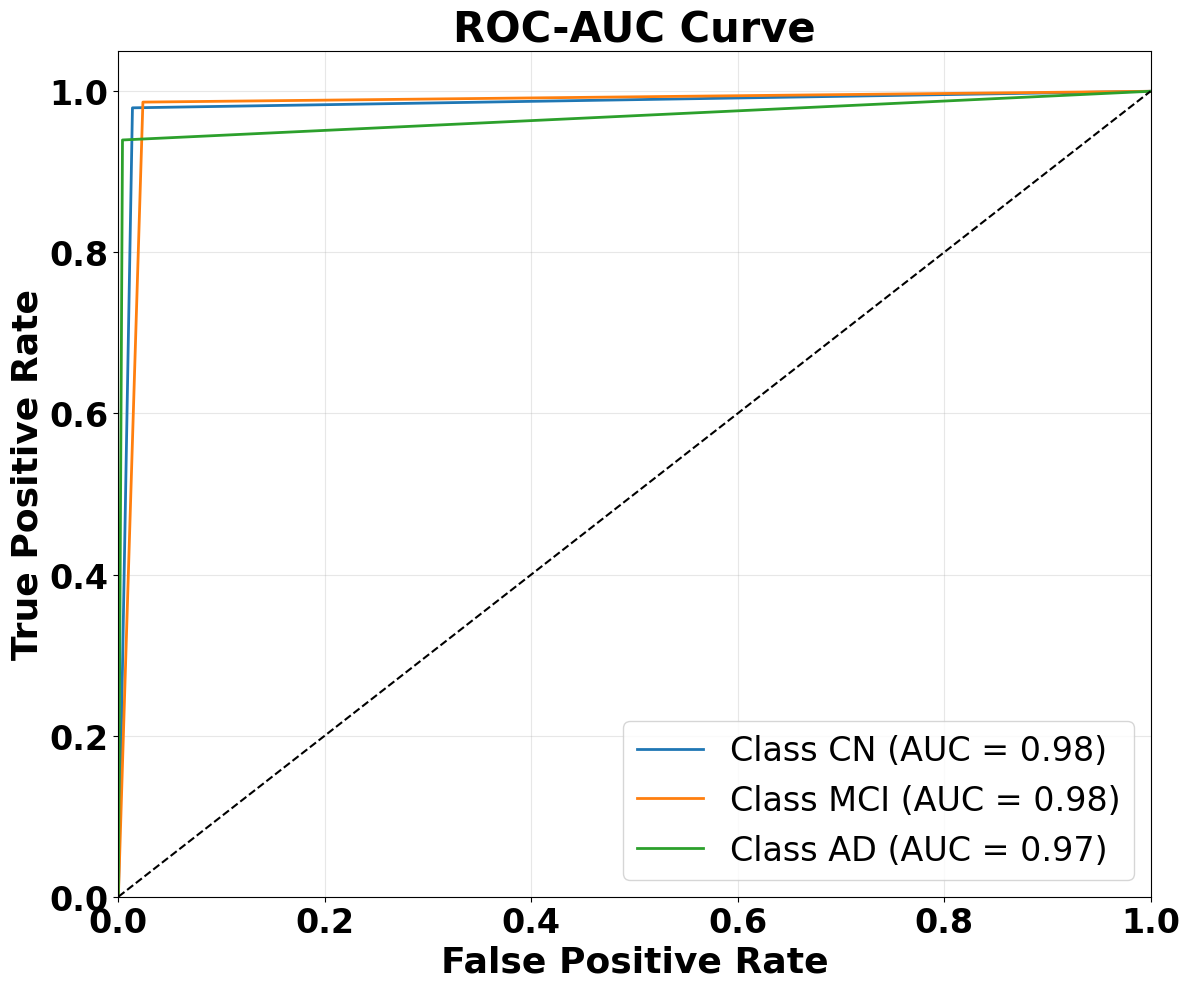

In [ ]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc
from tensorflow.keras.utils import to_categorical

def plot_roc_auc_curve(y_true, y_pred, num_classes, class_names):
    # Convert labels to one-hot encoding if not already
    y_true = to_categorical(y_true, num_classes=num_classes)
    y_pred = to_categorical(y_pred, num_classes=num_classes)

    # Set figure size
    plt.figure(figsize=(12, 10))

    # Plot ROC curve for each class
    for i in range(num_classes):
        fpr, tpr, _ = roc_curve(y_true[:, i], y_pred[:, i])
        roc_auc = auc(fpr, tpr)
        plt.plot(fpr, tpr, label=f'Class {class_names[i]} (AUC = {roc_auc:.2f})', linewidth=2)

    # Plot the diagonal line
    plt.plot([0, 1], [0, 1], 'k--', linewidth=1.5)

    # Customize fonts and labels
    plt.xlim([0.0, 1.0])
    plt.ylim([0.0, 1.05])
    plt.xlabel('False Positive Rate', fontsize=26, fontweight='bold')
    plt.ylabel('True Positive Rate', fontsize=26, fontweight='bold')
    plt.title('ROC-AUC Curve', fontsize=30, fontweight='bold')
    plt.legend(loc='lower right', fontsize=24)
    plt.xticks(fontsize=24, fontweight='bold')
    plt.yticks(fontsize=24, fontweight='bold')

    # Show the plot
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

# Call to the function (replace with your actual data and class names)
plot_roc_auc_curve(test_labels_encoded, ensemble_preds, num_classes, class_names)


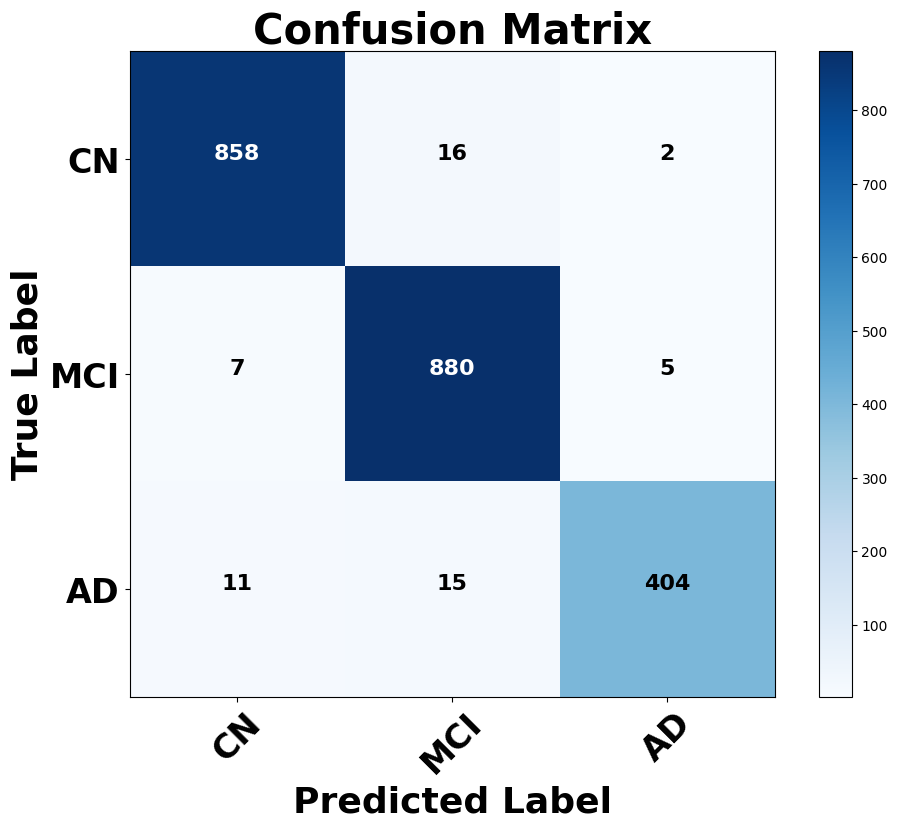

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix

def plot_confusion_matrix(y_true, y_pred, class_names):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(10, 8))
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title('Confusion Matrix', fontsize=30, fontweight='bold')
    plt.colorbar()

    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names, rotation=45, fontsize=24, fontweight='bold')
    plt.yticks(tick_marks, class_names, fontsize=24, fontweight='bold')

    # Add text annotations inside the confusion matrix
    thresh = cm.max() / 2.0
    for i, j in np.ndindex(cm.shape):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 fontsize=16, fontweight='bold',
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True Label', fontsize=26, fontweight='bold')
    plt.xlabel('Predicted Label', fontsize=26, fontweight='bold')
    plt.show()

# Example call to the function (replace with your actual data and class names)
plot_confusion_matrix(test_labels_encoded, ensemble_preds, class_names)


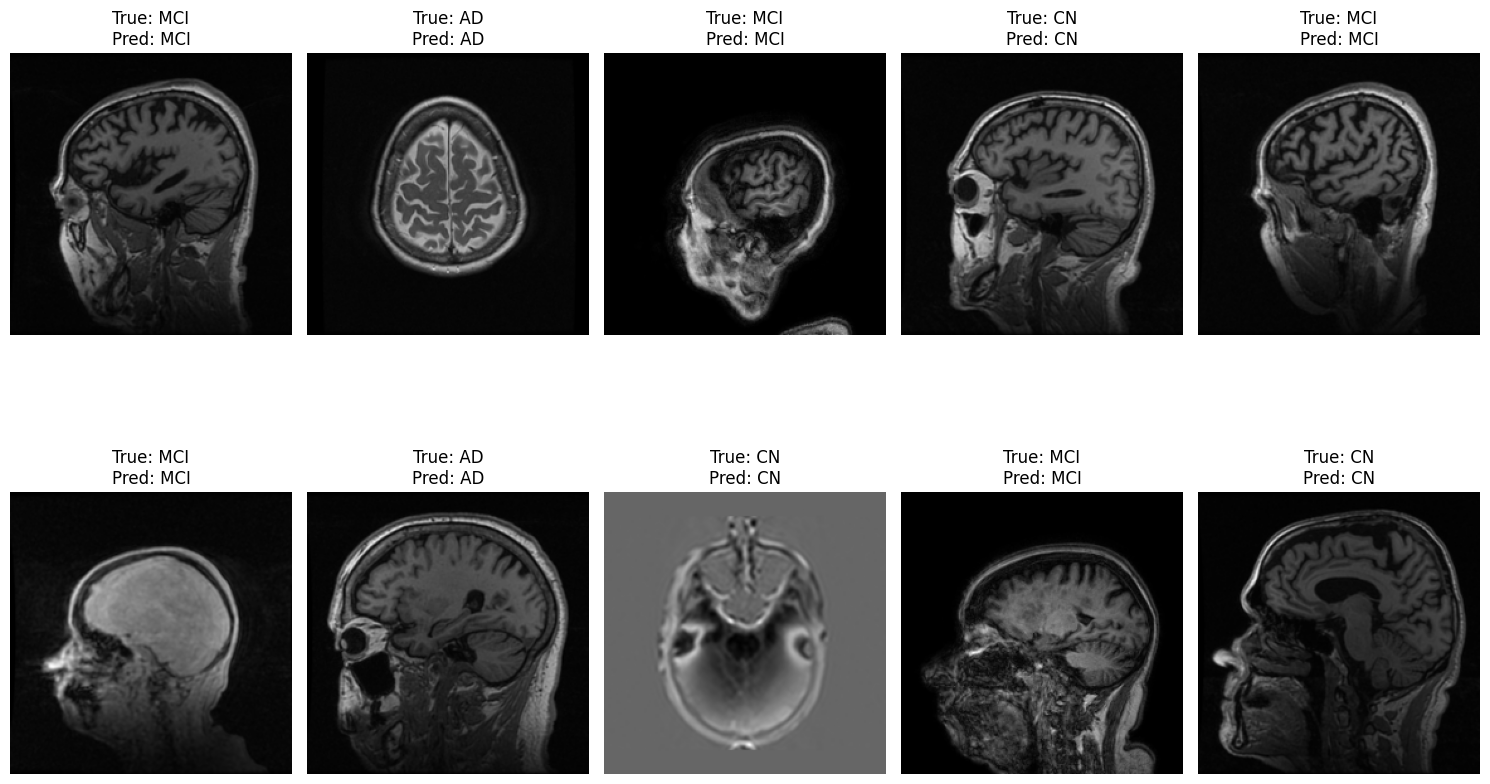

In [ ]:
# 4. Show predicted images with true and predicted labels
def plot_predicted_images(image_paths, labels, preds, num_images=10):
    plt.figure(figsize=(15, 10))
    for i in range(num_images):
        img = preprocess_image_only(image_paths[i]).numpy()  # Preprocess the image
        plt.subplot(2, 5, i+1)  # 2 rows, 5 columns
        plt.imshow(img)
        plt.title(f"True: {class_names[labels[i]]}\nPred: {class_names[preds[i]]}")
        plt.axis('off')
    plt.tight_layout()
    plt.show()

plot_predicted_images(test_image_paths, test_labels_encoded, ensemble_preds, num_images=10)


In [ ]:
# 5. Show classification report
print("Classification Report:")
print(classification_report(test_labels_encoded, ensemble_preds, target_names=class_names))


Classification Report:
              precision    recall  f1-score   support

          CN       0.98      0.98      0.98       876
         MCI       0.97      0.99      0.98       892
          AD       0.98      0.94      0.96       430

    accuracy                           0.97      2198
   macro avg       0.98      0.97      0.97      2198
weighted avg       0.97      0.97      0.97      2198



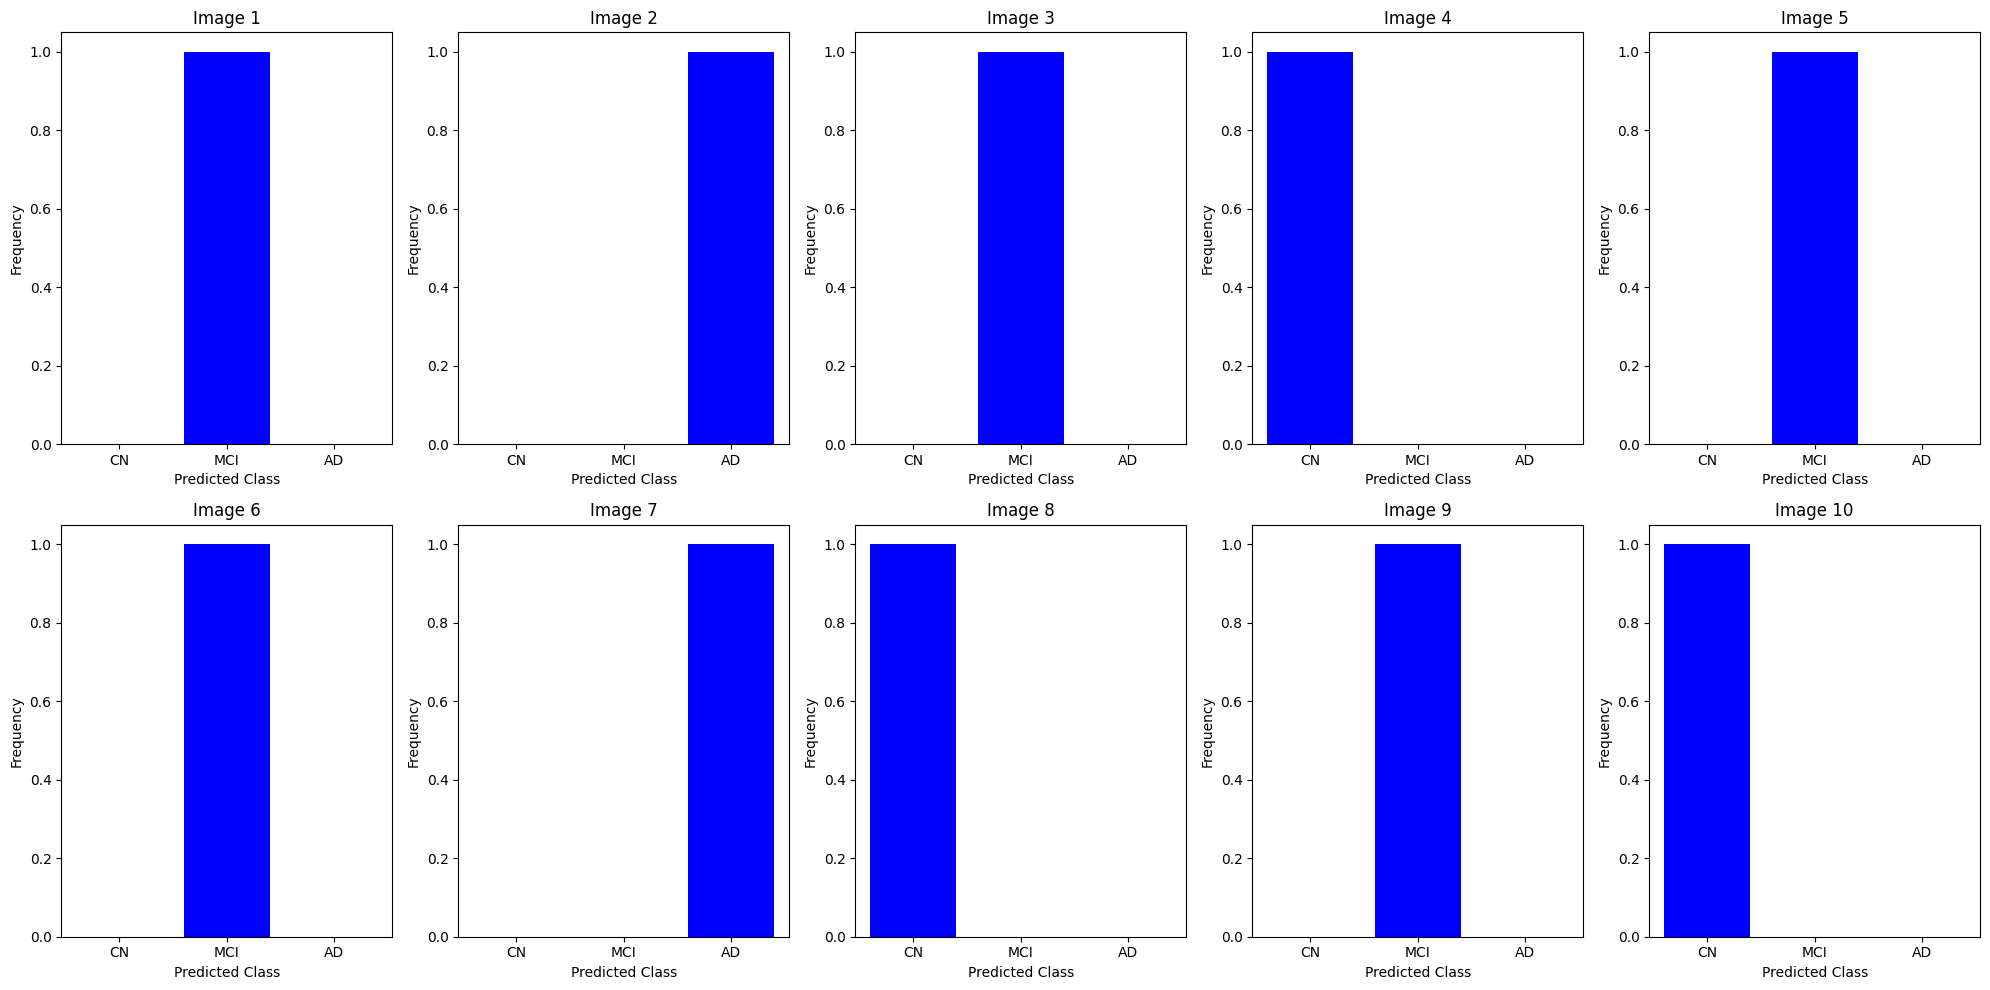

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Function to plot individual histograms for 10 images
def plot_hardvoting_histograms(predictions, num_classes, num_images=10):
    plt.figure(figsize=(20, 10))  # Adjust the figure size to accommodate 10 histograms

    # Loop over each image and plot its prediction
    for i in range(num_images):
        plt.subplot(2, 5, i+1)  # Create a 2x5 grid (2 rows, 5 columns)

        # Plot histogram for the individual image prediction
        plt.hist([predictions[i]], bins=np.arange(num_classes+1)-0.5, rwidth=0.8, align='mid', color='blue')

        # Set the x-ticks to correspond to the class names
        plt.xticks(np.arange(num_classes), class_names)

        # Set labels and title for each subplot
        plt.xlabel('Predicted Class')
        plt.ylabel('Frequency')
        plt.title(f"Image {i+1}")

    # Show the plot with 10 histograms
    plt.tight_layout()  # Adjust layout to prevent overlap
    plt.show()

# Example usage:
# Assuming ensemble_preds contains the predictions of the hard voting ensemble for each image
plot_hardvoting_histograms(ensemble_preds, num_classes=num_classes, num_images=10)


#Model Xplainability Used

#Grad-CAM

<ipython-input-35-68d41361cd59>:39: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to fit color bar and images


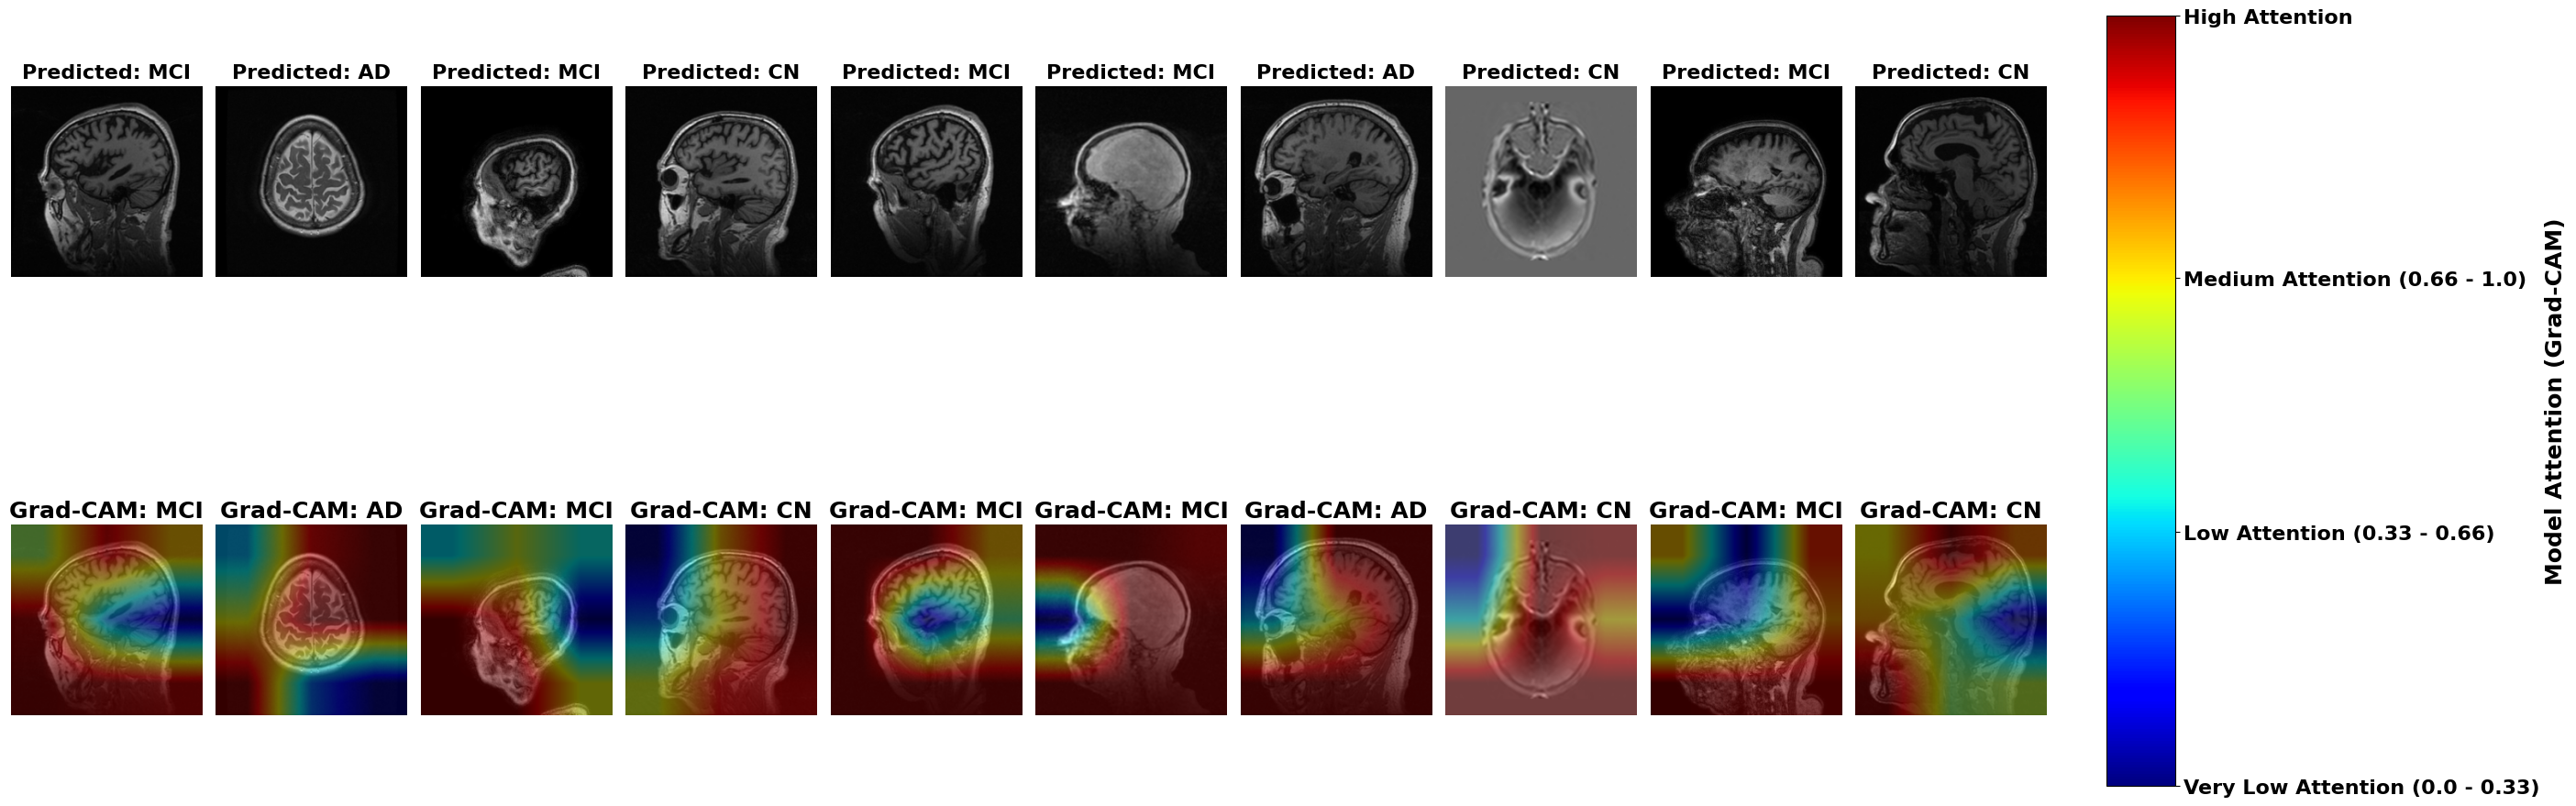

In [ ]:
import tensorflow.keras.backend as K
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Function to compute Grad-CAM
def compute_gradcam(model, img, layer_name, class_idx):
    grad_model = tf.keras.models.Model([model.inputs], [model.get_layer(layer_name).output, model.output])

    with tf.GradientTape() as tape:
        conv_outputs, predictions = grad_model(np.expand_dims(img, axis=0))
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, conv_outputs)
    pooled_grads = K.mean(grads, axis=(0, 1, 2))

    conv_outputs = conv_outputs[0]
    conv_outputs = tf.multiply(conv_outputs, pooled_grads)

    heatmap = np.mean(conv_outputs, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)

    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)

    img_uint8 = np.uint8(255 * img)
    superimposed_img = cv2.addWeighted(img_uint8, 0.6, heatmap, 0.4, 0)
    return superimposed_img

# Function to display Grad-CAM alongside the predicted image with improved legend and size
def display_gradcam_with_predicted(model, image_paths, preds, class_names, class_idx, layer_name, num_samples=10):
    plt.figure(figsize=(25, 12))  # Increase figure size for larger images

    for i in range(num_samples):
        # Preprocess the image
        img = preprocess_image_only(image_paths[i]).numpy()
        gradcam_image, heatmap_resized = compute_gradcam(model, img, layer_name, preds[i])

        # Display predicted image and Grad-CAM
        plt.subplot(2, num_samples, i + 1)  # Row 1: Predicted image
        plt.imshow(img)
        plt.title(f"Predicted: {class_names[preds[i]]}", fontsize=16, fontweight='bold')  # Larger font for titles
        plt.axis('off')

        plt.subplot(2, num_samples, num_samples + i + 1)  # Row 2: Grad-CAM
        plt.imshow(gradcam_image)
        plt.title(f"Grad-CAM: {class_names[preds[i]]}", fontsize=18, fontweight='bold')  # Larger title
        plt.axis('off')

    # Add a color bar to explain the color coding
    cbar_ax = plt.axes([0.92, 0.15, 0.03, 0.7])  # Adjust the position of the color bar
    sm = plt.cm.ScalarMappable(cmap='jet', norm=plt.Normalize(vmin=0, vmax=1))
    sm.set_array([])  # Empty array for ScalarMappable
    cbar = plt.colorbar(sm, cax=cbar_ax)

    # Label the color bar to indicate different levels of attention
    cbar.set_label('Model Attention (Grad-CAM)', fontsize=18, fontweight='bold')  # Larger font for label

    # Set custom ticks and labels with numeric ranges
    cbar.ax.yaxis.set_ticks([0, 0.33, 0.66, 1.0])  # Set tick positions at low, medium, and high levels
    cbar.ax.set_yticklabels([
        'Very Low Attention (0.0 - 0.33)',  # Added a fourth label for consistency
        'Low Attention (0.33 - 0.66)',
        'Medium Attention (0.66 - 1.0)',
        'High Attention'
    ], fontsize=16, fontweight='bold')  # Larger font for tick labels

    plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout to fit color bar and images
    plt.show()

    # Example usage:
# Assuming ensemble_preds contains the predictions of the hard voting ensemble for each image
display_gradcam_with_predicted(models[0], test_image_paths, ensemble_preds, class_names, class_idx=1, layer_name='conv2d_5', num_samples=10)

#LIME

  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 24ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 24ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 24ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 28ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 26ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 27ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 24ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 24ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 24ms/step


  0%|          | 0/1000 [00:00<?, ?it/s]

1/1 [==============================] - 0s 24ms/step


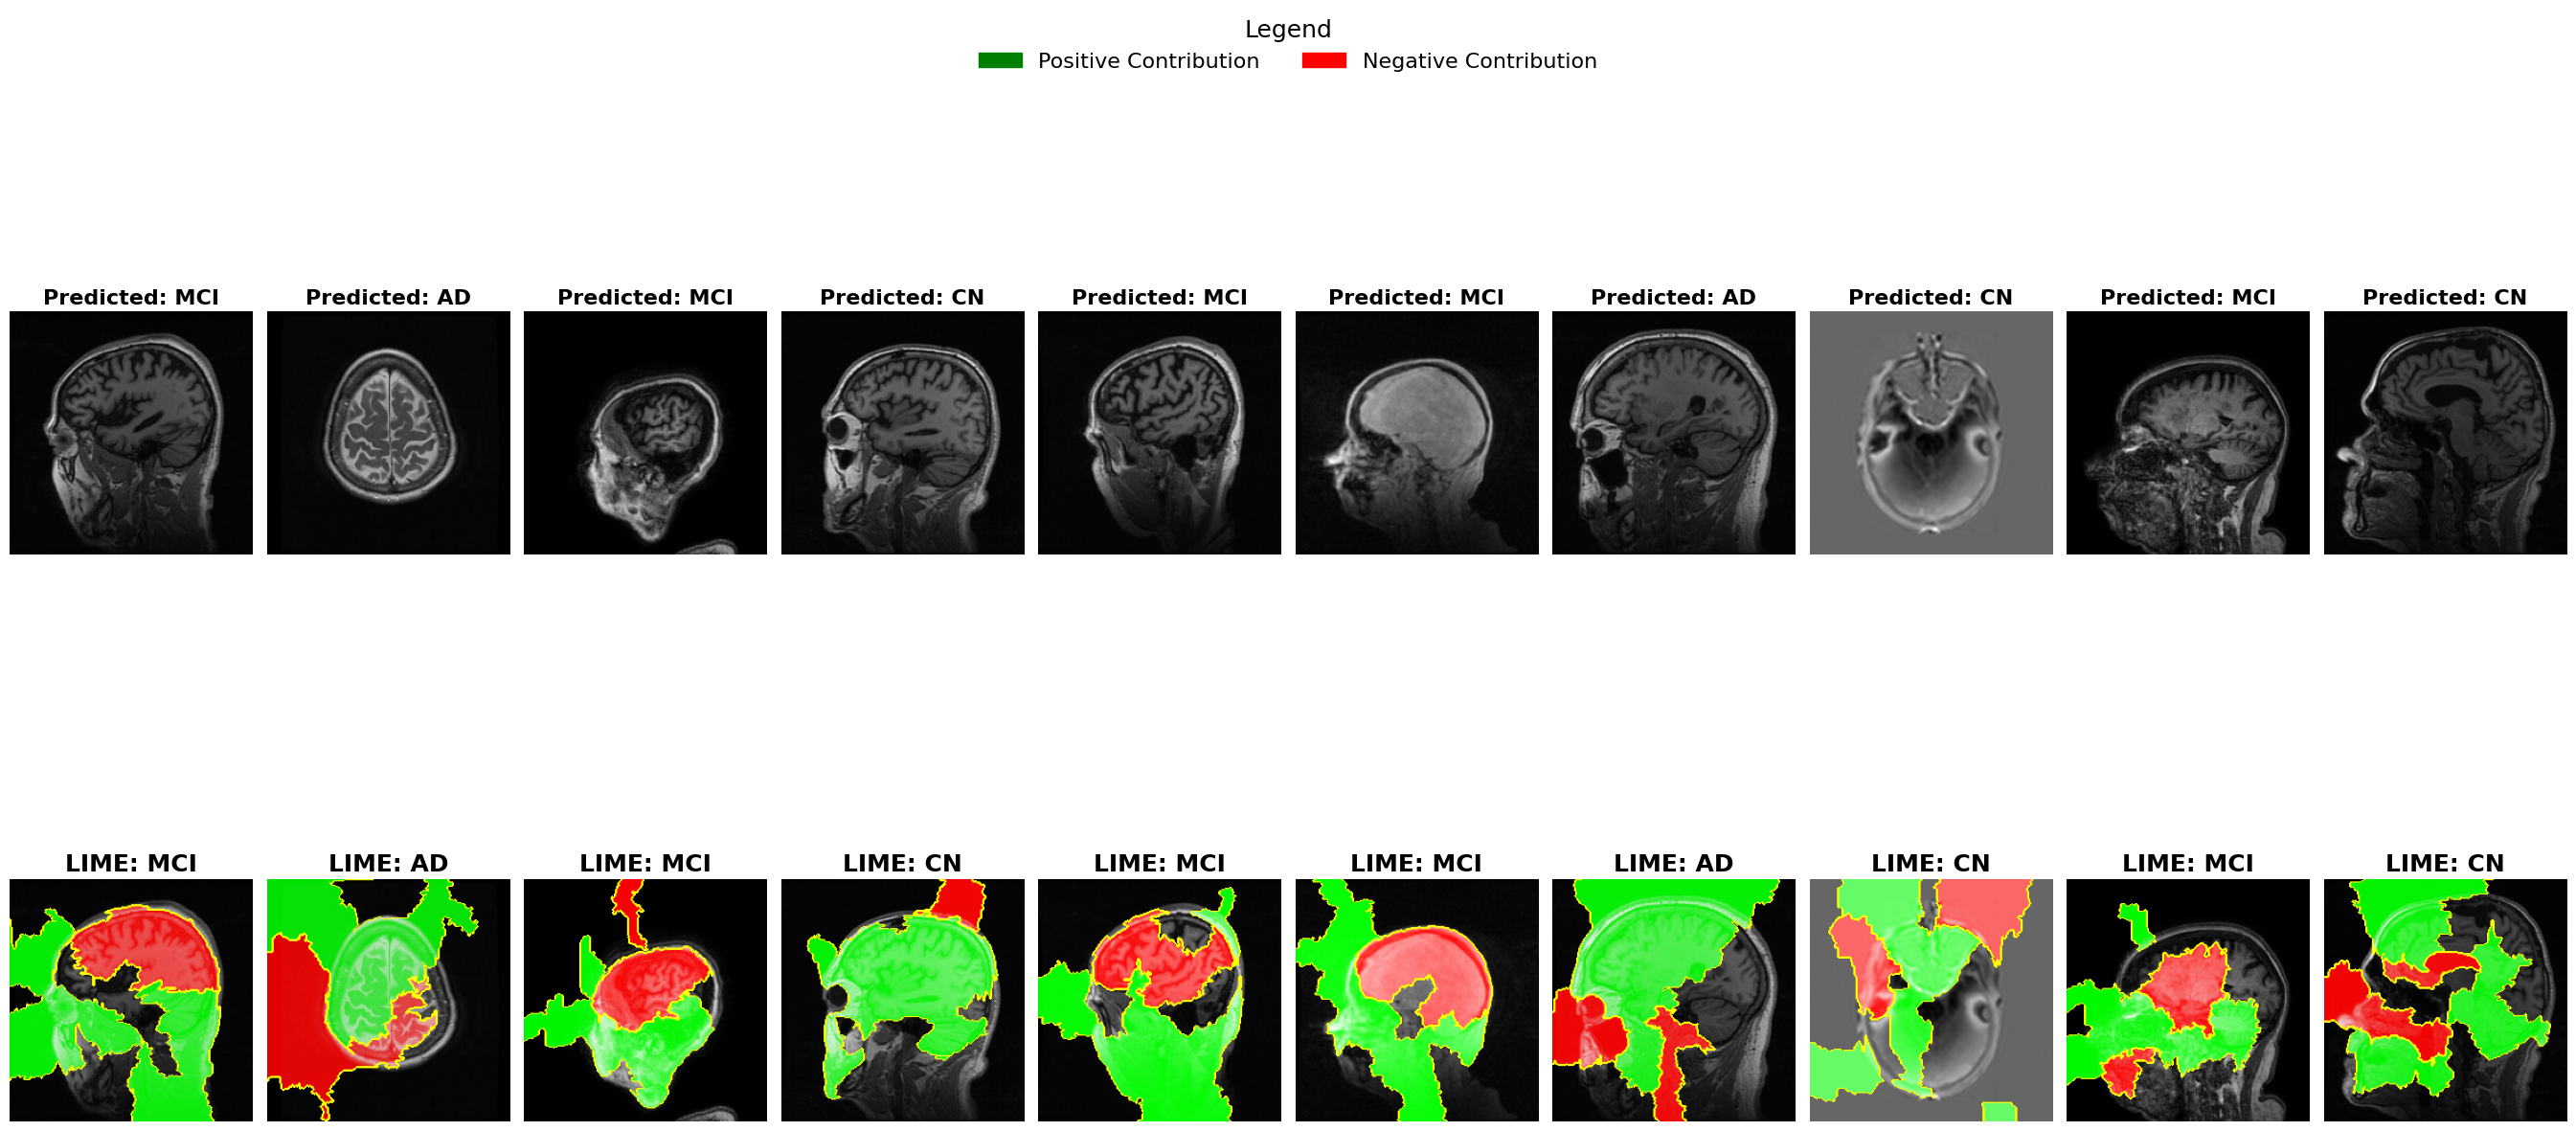

In [ ]:
import lime
import lime.lime_image
from skimage.segmentation import mark_boundaries
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches

# Function to preprocess and format the input for LIME
def preprocess_lime_image(image_path):
    img = preprocess_image_only(image_path)  # Assuming preprocess_image_only function returns a NumPy array or Tensor
    img_np = img.numpy() if hasattr(img, 'numpy') else img  # Convert TensorFlow tensor to NumPy array if necessary
    return img_np

# Function to display LIME explanation for multiple images
def display_lime_with_predicted_labels_and_legend(model, image_paths, preds, class_names, num_samples=10):
    explainer = lime.lime_image.LimeImageExplainer()

    plt.figure(figsize=(30, 15))  # Adjust the size for better visualization

    for i in range(num_samples):
        img = preprocess_lime_image(image_paths[i])  # Preprocess each image

        # Explain the model's prediction for this image
        explanation = explainer.explain_instance(
            img,                              # Preprocessed image
            model.predict,                    # Model's prediction function
            top_labels=1,                     # Number of top labels to explain
            hide_color=0,                     # Set background color for perturbation
            num_samples=1000                  # Number of samples for generating explanation
        )

        # Get the image and mask for the top predicted label
        lime_image, mask = explanation.get_image_and_mask(
            label=preds[i],                   # Explain the predicted label
            positive_only=False,              # Highlight both positive and negative contributions
            hide_rest=False,                  # Show entire image
            num_features=10,                  # Number of superpixels to highlight
            min_weight=0.0                    # Minimum weight to consider
        )

        # Display predicted image and LIME explanation
        plt.subplot(2, num_samples, i + 1)  # Row 1: Predicted image
        plt.imshow(img)
        plt.title(f'Predicted: {class_names[preds[i]]}', fontsize=16, fontweight='bold')  # Larger, bold title
        plt.axis('off')

        plt.subplot(2, num_samples, num_samples + i + 1)  # Row 2: LIME explanation
        plt.imshow(mark_boundaries(lime_image, mask))
        plt.title(f'LIME: {class_names[preds[i]]}', fontsize=18, fontweight='bold')  # Updated title
        plt.axis('off')

    # Add a legend for LIME explanation colors
    green_patch = mpatches.Patch(color='green', label='Positive Contribution')
    red_patch = mpatches.Patch(color='red', label='Negative Contribution')

    plt.figlegend(
        handles=[green_patch, red_patch],
        loc='upper center',
        fontsize=16,
        ncol=2,
        frameon=False,
        title='Legend',
        title_fontsize=18,
    )

    plt.tight_layout(rect=[0, 0, 0.9, 1])  # Adjust layout for better alignment
    plt.show()

# Example usage:
# Apply LIME to 10 images and display predicted class labels with a legend
display_lime_with_predicted_labels_and_legend(models[0], test_image_paths, ensemble_preds, class_names, num_samples=10)


#Saliency

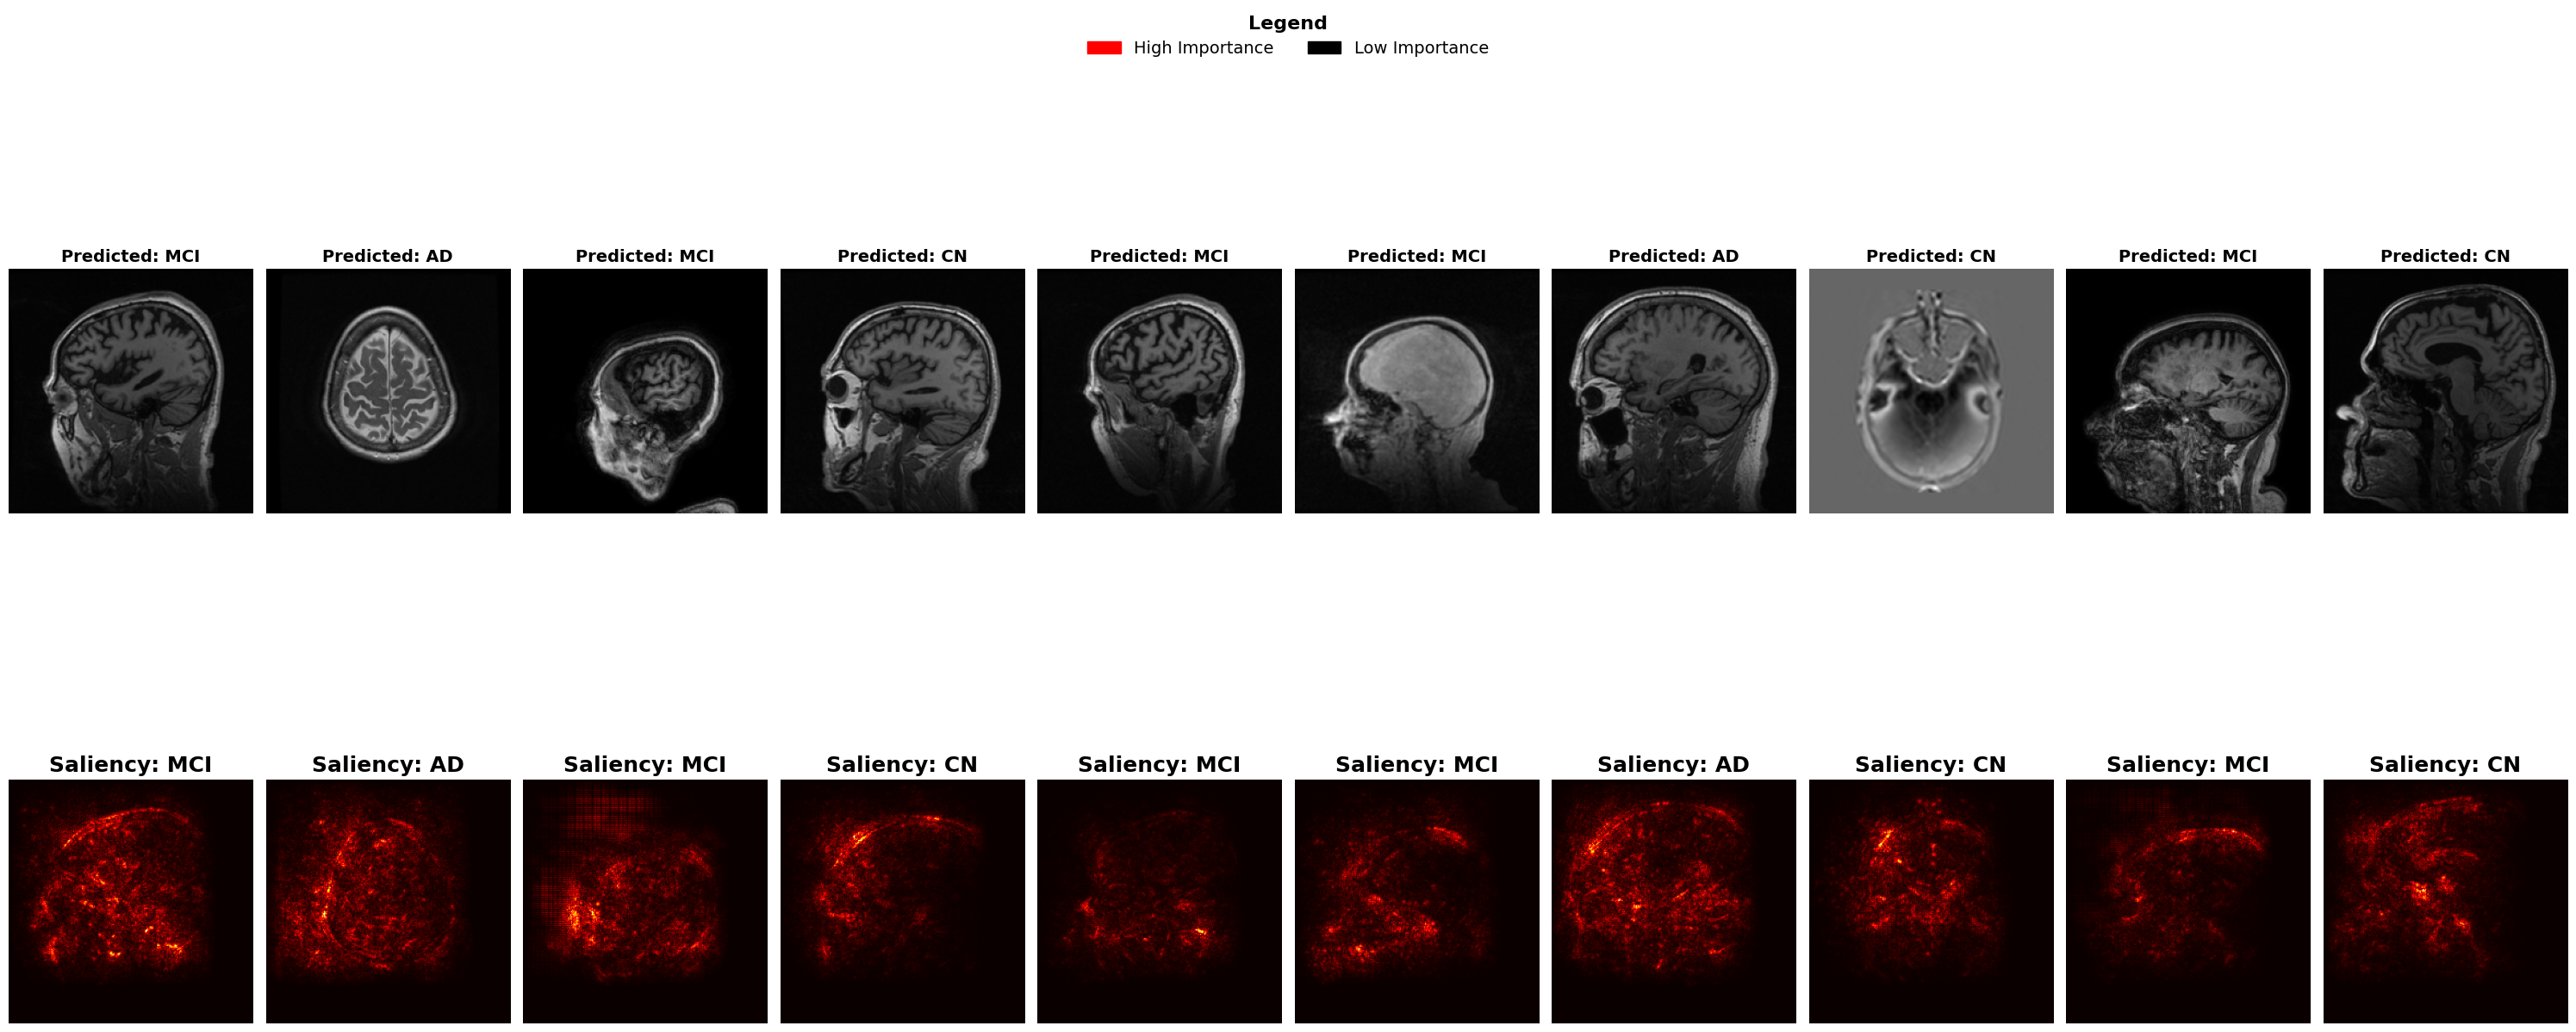

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

# Function to compute the Saliency Map
def compute_saliency_map(model, img, class_idx):
    img_tensor = tf.convert_to_tensor(np.expand_dims(img, axis=0))
    with tf.GradientTape() as tape:
        tape.watch(img_tensor)
        predictions = model(img_tensor)
        loss = predictions[:, class_idx]

    grads = tape.gradient(loss, img_tensor)
    saliency = np.max(np.abs(grads), axis=-1)[0]

    saliency = (saliency - np.min(saliency)) / (np.max(saliency) - np.min(saliency))
    return saliency

# Function to display the predicted images and saliency maps for the stacking ensemble
def display_saliency_for_stacking(models, image_paths, preds, class_names, num_samples=10):
    plt.figure(figsize=(30, 15))  # Increased figure size for better visualization

    for i in range(num_samples):
        # Preprocess the image
        img = preprocess_image_only(image_paths[i])  # Assuming this function returns a TensorFlow tensor or NumPy array

        # Convert TensorFlow tensor to NumPy array if needed
        img_np = img.numpy() if isinstance(img, tf.Tensor) else img  # Convert to NumPy array for visualization

        # Display the predicted image
        plt.subplot(2, num_samples, i + 1)  # Row 1: Predicted images
        plt.imshow(img_np.squeeze(), cmap='gray' if img_np.shape[-1] == 1 else None)  # Adjust for grayscale or RGB
        plt.title(f'Predicted: {class_names[preds[i]]}', fontsize=14, fontweight='bold')  # Larger, bold text
        plt.axis('off')

        # Display the saliency map for the first model in the stacking ensemble
        saliency_map = compute_saliency_map(models[0], img_np, preds[i])  # Use the first model for saliency

        # Display the saliency map in the next row
        plt.subplot(2, num_samples, num_samples + i + 1)  # Row 2: Saliency maps
        plt.imshow(saliency_map, cmap='hot')
        plt.title(f'Saliency: {class_names[preds[i]]}', fontsize=18, fontweight='bold')  # Updated title
        plt.axis('off')

    # Add a color legend for saliency map visualization
    red_patch = mpatches.Patch(color='red', label='High Importance')
    black_patch = mpatches.Patch(color='black', label='Low Importance')
    legend = plt.figlegend(handles=[red_patch, black_patch], loc='upper center', fontsize=14, frameon=False, ncol=2)

    # Customize the legend title
    legend.set_title('Legend', prop={'size': 16, 'weight': 'bold'})  # Set bold and large legend title

    plt.tight_layout()
    plt.show()

# Example usage:
# Assuming `models` is a list of your base models in the stacking ensemble
# `preds` contains the predicted class indices, and `class_names` contains the corresponding class names

# Display saliency maps and predicted images for 10 samples
display_saliency_for_stacking(models, test_image_paths, ensemble_preds, class_names, num_samples=10)